# Regression
---------------------------------

This example shows how to use ATOM to apply PCA on the data and run a regression pipeline.

Download the abalone dataset from [https://archive.ics.uci.edu/ml/datasets/Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone). The goal of this dataset is to predict the rings (age) of abalone shells from physical measurements.

### Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

In [2]:
# Load the abalone dataset
X = pd.read_csv('./datasets/abalone.csv')

# Let's have a look at the data
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Initialize ATOM for regression tasks and encode the categorical features
atom = ATOMRegressor(X, "Rings", verbose=2, random_state=42)
atom.encode()

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ================== >>
Shape: (4177, 9)
Categorical columns: 1
Scaled: False
-----------------------------------
Train set size: 3342
Test set size: 835

Fitting Encoder...
Encoding categorical columns...
 --> OneHot-encoding feature Sex. Contains 3 unique classes.


is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


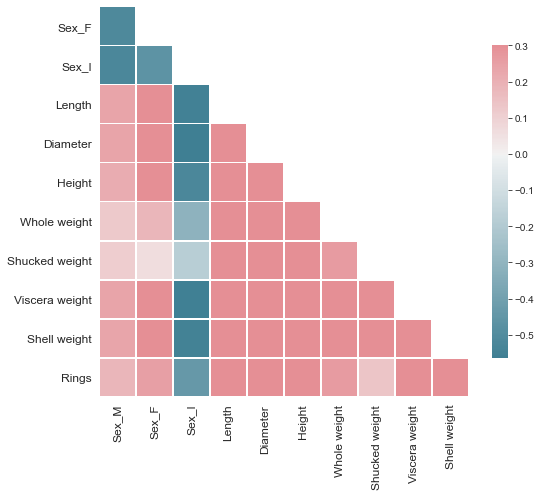

In [4]:
# Plot the dataset's correlation matrix
atom.plot_correlation()

In [5]:
# Apply PCA for dimensionality reduction
atom.feature_selection(strategy="pca", n_features=6)

Fitting FeatureSelector...
Performing feature selection ...
 --> Applying Principal Component Analysis...
   >>> Scaling features...
   >>> Total explained variance: 0.976


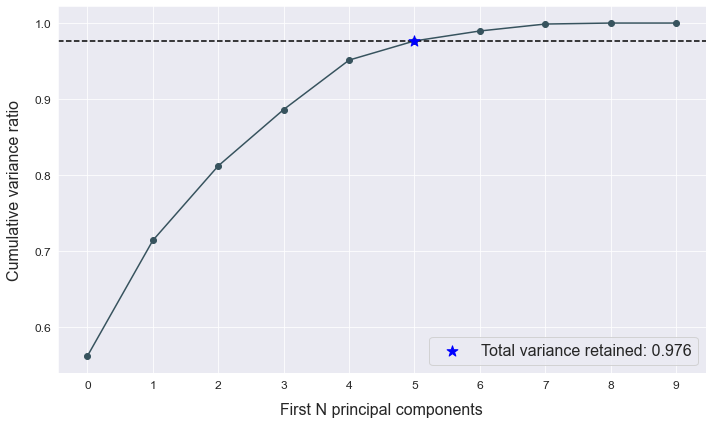

In [6]:
# Use the plotting methods to see the retained variance ratio
atom.plot_pca()

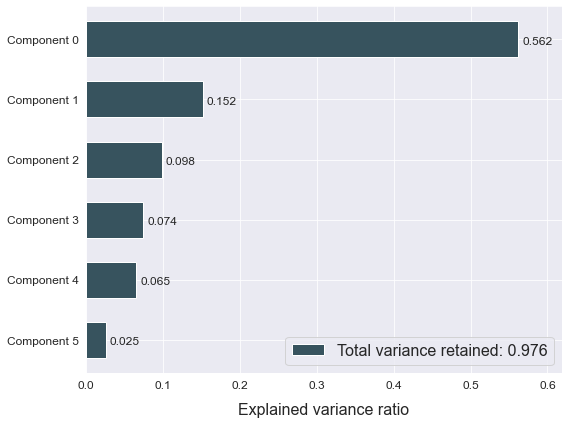

In [7]:
atom.plot_components(figsize=(8, 6), filename='atom_PCA_plot')

### Run the pipeline

In [8]:
atom.run(
    models=['Tree', 'Bag', 'ET'],
    metric='MSE',
    n_calls=5,
    n_initial_points=2,
    bo_params={'base_estimator': 'GBRT', 'cv': 1},
    bagging=5
)


Training ===================================== >>
Models: Tree, Bag, ET
Metric: neg_mean_squared_error


Running BO for Decision Tree...
Initial point 1 ---------------------------------
Parameters --> {'criterion': 'mae', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 19, 'max_features': None, 'ccp_alpha': 0.016}
Evaluation --> neg_mean_squared_error: -8.3677  Best neg_mean_squared_error: -8.3677
Time iteration: 0.054s   Total time: 0.054s
Initial point 2 ---------------------------------
Parameters --> {'criterion': 'mae', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 12, 'max_features': 0.9, 'ccp_alpha': 0.0}
Evaluation --> neg_mean_squared_error: -8.2055  Best neg_mean_squared_error: -8.2055
Time iteration: 0.170s   Total time: 0.228s
Iteration 3 -------------------------------------
Parameters --> {'criterion': 'mae', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_featur

### Analyze the results

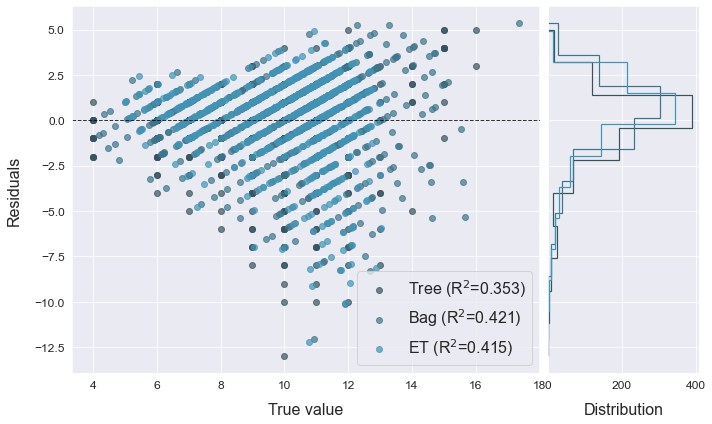

In [9]:
# For regression tasks, use the errors or residuals plots to check the model performances
atom.plot_residuals()

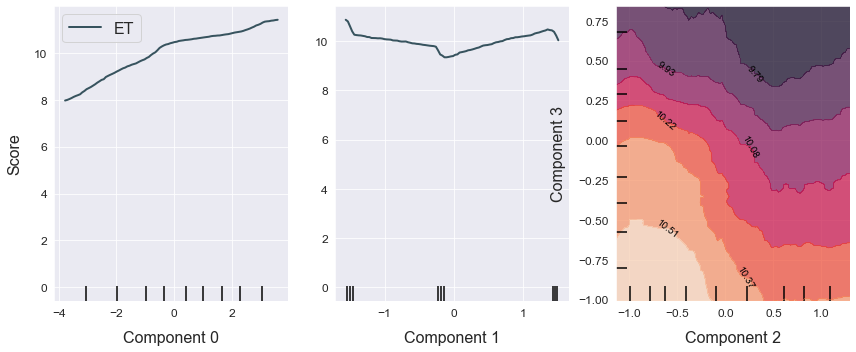

In [10]:
# Use the partial dependence plot to analyze the relation between the target response and the features
atom.n_jobs = 8  # The method can be slow...
atom.ET.plot_partial_dependence(features=(0, 1, (2, 3)), figsize=(12, 5))